In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import json
import warnings
import datetime

In [2]:
file = "USvideos.csv"

youtube_vids_df = pd.read_csv(file)
youtube_vids_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
warnings.filterwarnings('ignore')

In [4]:
youtube_vids_df.replace({"category_id": {22: "People & Blogs", 1: "Film & Animation", 2: "Auto & Vehicles", 10: "Music", 15: "Pets & Animals", 17:"Sports", 19: "Travel & Events", 20: "Gaming", 23:"Comedy", 24:"Entertainment", 25: "News & Politics", 26: "Howto & Style", 27: "Education", 28: "Science & Technology", 29: "Non-Profits & Activism", 18: "Short Movies", 21: "Videoblogging", 30: "Movies", 31: "Anime/Animation", 32: "Action/Adventure", 33: "Classics", 34: "Comedy", 35: "Documentary", 36: "Drama", 37: "Family", 38: "Foreign", 39: "Horror", 40: "Sci-Fi/Fantasy", 41: "Thriller", 42: "Sports", 43: "Shows", 44: "Trailers"}})

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,Science & Technology,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,Entertainment,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,Science & Technology,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,Film & Animation,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,News & Politics,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


In [5]:
# Create a group based on the values in the 'category id' column

category_id_group = youtube_vids_df.groupby('category_id').count()['title']
category_id_group

category_id
1     2345
2      384
10    6472
15     920
17    2174
19     402
20     817
22    3210
23    3457
24    9964
25    2487
26    4146
27    1656
28    2401
29      57
43      57
Name: title, dtype: int64

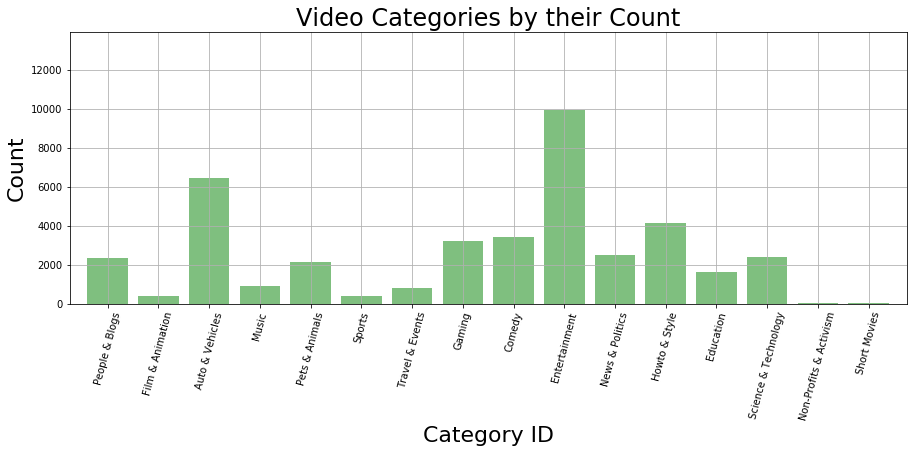

<Figure size 432x288 with 0 Axes>

In [6]:
# Create a bar chart based off the group
plt.figure(figsize=(15,5))
x_axis = np.arange(len(category_id_group))
plt.bar(x_axis, category_id_group, color="green", align="center", alpha=0.5)

# Tell Matplotlib where you would like to place each of our x axis headers

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["People & Blogs", "Film & Animation", "Auto & Vehicles", "Music", "Pets & Animals", "Sports", "Travel & Events", "Gaming", "Comedy", "Entertainment", "News & Politics", "Howto & Style", "Education", "Science & Technology",  "Non-Profits & Activism", "Short Movies", "Videoblogging", "Movies", "Anime/Animation", "Action/Adventure", "Classics", "Comedy", "Documentary", "Drama", "Family", "Foreign", "Horror", "Sci-Fi/Fantasy", "Thriller", "Sports", "Shows", "Trailers"])
plt.xticks(rotation=75)

# Set the x and y limits of the current chart

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(category_id_group)+4000)

# Set the xlabel, ylabel and title

plt.xlabel('Category ID', size = 22)
plt.ylabel('Count', size = 22)
plt.title('Video Categories by their Count', size = 24)
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.grid()
plt.show()
plt.savefig('Video Categories by their Count.png')

In [7]:
# Find which trending date had the largest number of trending video
youtube_vids_df['trending_date'] = pd.to_datetime(youtube_vids_df['trending_date'], format='%y.%d.%m')
print(youtube_vids_df['trending_date'].head())

0   2017-11-14
1   2017-11-14
2   2017-11-14
3   2017-11-14
4   2017-11-14
Name: trending_date, dtype: datetime64[ns]


In [8]:
# Find which publishing hours had the largest number of trending video
youtube_vids_df['publish_time'] = pd.to_datetime(youtube_vids_df['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
print(youtube_vids_df['publish_time'].head())

0   2017-11-13 17:13:01
1   2017-11-13 07:30:00
2   2017-11-12 19:05:24
3   2017-11-13 11:00:04
4   2017-11-12 18:01:41
Name: publish_time, dtype: datetime64[ns]


In [9]:
# Create a group based on the values in the 'trending_date' column
trending_date_group = youtube_vids_df.groupby('trending_date').count()['title']
trending_date_group

trending_date
2017-11-14    200
2017-11-15    200
2017-11-16    200
2017-11-17    200
2017-11-18    200
2017-11-19    200
2017-11-20    200
2017-11-21    200
2017-11-22    200
2017-11-23    200
2017-11-24    200
2017-11-25    200
2017-11-26    200
2017-11-27    200
2017-11-28    200
2017-11-29    200
2017-11-30    200
2017-12-01    200
2017-12-02    200
2017-12-03    200
2017-12-04    200
2017-12-05    200
2017-12-06    200
2017-12-07    200
2017-12-08    200
2017-12-09    200
2017-12-10    200
2017-12-11    200
2017-12-12    200
2017-12-13    200
             ... 
2018-05-16    200
2018-05-17    200
2018-05-18    200
2018-05-19    200
2018-05-20    200
2018-05-21    200
2018-05-22    200
2018-05-23    200
2018-05-24    200
2018-05-25    200
2018-05-26    200
2018-05-27    200
2018-05-28    200
2018-05-29    200
2018-05-30    200
2018-05-31    200
2018-06-01    200
2018-06-02    200
2018-06-03    200
2018-06-04    200
2018-06-05    200
2018-06-06    200
2018-06-07    200
2018-06-08    

In [10]:
youtube_vids_df.insert(4, 'publish_date', youtube_vids_df['publish_time'].dt.date)
youtube_vids_df['publish_time'] = youtube_vids_df['publish_time'].dt.time
print(youtube_vids_df[['publish_date', 'publish_time']].head())

  publish_date publish_time
0   2017-11-13     17:13:01
1   2017-11-13     07:30:00
2   2017-11-12     19:05:24
3   2017-11-13     11:00:04
4   2017-11-12     18:01:41


In [11]:
# Create a group based on the values in the 'publish_time' column
publish_time_group = youtube_vids_df.groupby('publish_time').count()['views']
publish_time_group

publish_time
00:00:00    34
00:00:01    46
00:00:02    29
00:00:03    24
00:00:04    27
00:00:26     4
00:00:28     2
00:00:41     4
00:01:00    12
00:01:01    13
00:01:03     4
00:01:05     5
00:01:11    12
00:01:39     4
00:01:42     2
00:02:49     5
00:03:46     6
00:03:47     1
00:03:56     9
00:04:08     7
00:04:16     7
00:04:22     1
00:04:28     7
00:05:20     1
00:05:21    14
00:05:23     6
00:05:42    14
00:05:47     2
00:06:03     9
00:06:45     2
            ..
23:49:13     1
23:49:43     4
23:49:46     6
23:49:56    11
23:50:01     9
23:50:14     8
23:50:32     4
23:50:43    12
23:50:47     7
23:51:45    15
23:52:14    20
23:52:38     9
23:53:26     6
23:53:56     3
23:54:08     1
23:54:33     6
23:54:39     1
23:54:43    10
23:55:10     6
23:55:21     7
23:55:56     9
23:55:58     7
23:57:04     4
23:57:32    11
23:57:34     7
23:57:49     1
23:58:50     3
23:59:08     2
23:59:22    13
23:59:24     4
Name: views, Length: 4478, dtype: int64

In [12]:
youtube_vids_df.index.duplicated()

array([False, False, False, ..., False, False, False])

In [13]:
category_count = youtube_vids_df['publish_time'].value_counts()
type(youtube_vids_df['publish_time'])

pandas.core.series.Series

In [14]:
publish_time_group

publish_time
00:00:00    34
00:00:01    46
00:00:02    29
00:00:03    24
00:00:04    27
00:00:26     4
00:00:28     2
00:00:41     4
00:01:00    12
00:01:01    13
00:01:03     4
00:01:05     5
00:01:11    12
00:01:39     4
00:01:42     2
00:02:49     5
00:03:46     6
00:03:47     1
00:03:56     9
00:04:08     7
00:04:16     7
00:04:22     1
00:04:28     7
00:05:20     1
00:05:21    14
00:05:23     6
00:05:42    14
00:05:47     2
00:06:03     9
00:06:45     2
            ..
23:49:13     1
23:49:43     4
23:49:46     6
23:49:56    11
23:50:01     9
23:50:14     8
23:50:32     4
23:50:43    12
23:50:47     7
23:51:45    15
23:52:14    20
23:52:38     9
23:53:26     6
23:53:56     3
23:54:08     1
23:54:33     6
23:54:39     1
23:54:43    10
23:55:10     6
23:55:21     7
23:55:56     9
23:55:58     7
23:57:04     4
23:57:32    11
23:57:34     7
23:57:49     1
23:58:50     3
23:59:08     2
23:59:22    13
23:59:24     4
Name: views, Length: 4478, dtype: int64

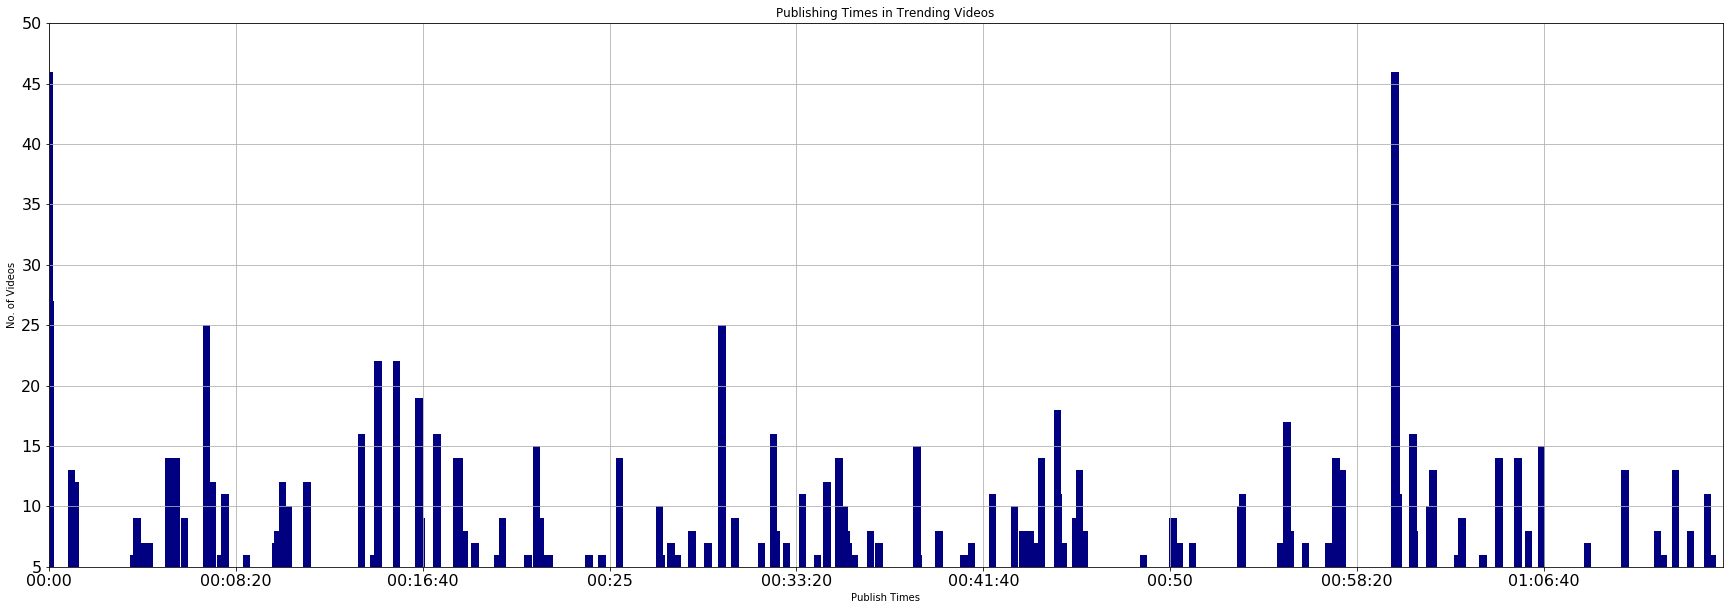

In [15]:
# Create a bar chart based off the group
plt.figure(figsize=(30,10))
x_axis = publish_time_group.index.tolist()
y_axis = publish_time_group.values.tolist()

plt.bar(x_axis, y_axis, color="navy", align="center", alpha=1.0, width=20.0, linewidth=1.0)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+50)

# Set the xlabel, ylabel and title

plt.title('Publishing Times in Trending Videos')
plt.xlabel('Publish Times')
plt.ylabel('No. of Videos')
axes = plt.axes()
axes.set_ylim([5,50])

plt.grid()
plt.show()


<Figure size 1080x360 with 0 Axes>

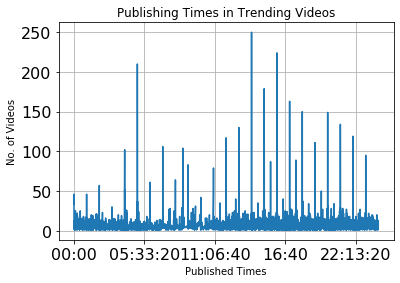

In [16]:
plt.figure(figsize=(15,5))

fig, ax = plt.subplots()
ax.plot(x_axis, y_axis)

# Label axis and give the chart a title
ax.set_title('Publishing Times in Trending Videos')
ax.set_xlabel('Published Times')
ax.set_ylabel('No. of Videos')

plt.grid()
plt.savefig('Publishing Times in Trending Videos.png')

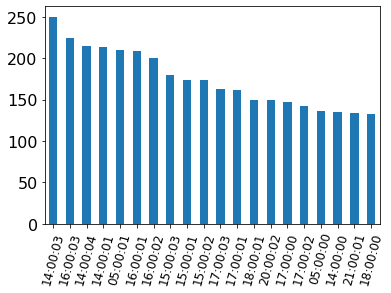

<Figure size 432x288 with 0 Axes>

In [17]:
#Create a bar graph for top 20 publishing times

ax = category_count[:20].plot.bar()
ax.set_xticklabels(labels=category_count.index, rotation=75, fontsize=12)
plt.show()
plt.savefig('Top20 Publishing Times.png')